<h1 style="text-align:center">New York City Taxi Trip Duration</h1>

<h3 style="text-align:center">Load Libraries</h3>

In [2]:
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from bokeh.plotting import figure, show 
from bokeh.charts import Donut, show
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h3 style="text-align:center">Load Dataset</h3>

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (1458644, 11)
Test set shape: (625134, 9)


<h3 style="text-align:center">Data exploration</h3>

In [5]:
# Observation of the first 5 elements in the training set
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
# Check the types or each features
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Analyze missing data 

In [8]:
# print(train_df.isnull().sum(), "\n")
# print(test_df.isnull().sum())

pd.DataFrame( {'missing values(train set)': train_df.isnull().sum(),
              'missing values(test_set)' : test_df.isnull().sum() } )

,missing values(test_set),missing values(train set)
dropoff_datetime,NaN,0
dropoff_latitude,0.0,0
dropoff_longitude,0.0,0
id,0.0,0
passenger_count,0.0,0
pickup_datetime,0.0,0
pickup_latitude,0.0,0
pickup_longitude,0.0,0
store_and_fwd_flag,0.0,0
trip_duration,NaN,0


There's no missing data in both the train and test dataframe

<u>Target Feature</u>

In [9]:
# pd.options.display.float_format = '{:,.2f}'.format
train_df['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

Let's observe the skewness of the trip duration

In [10]:
train_df['trip_duration'].skew()

343.1639435917362

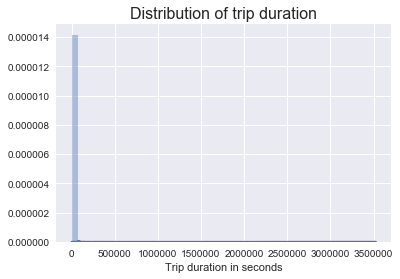

In [11]:
sns.distplot(train_df['trip_duration'])
plt.title("Distribution of trip duration", size=16)
plt.xlabel("Trip duration in seconds")
plt.show()

In regression problems, it is important to look for the skewness of the target feature. <br>
In fact, algorithms such as linear regression or K-Nearest Neighbors are sensitive to the skewness of the data. <br>
The most common correction for a positive skew is to apply <i>the Log transform</i> to have a normally distributed variable.

Skew is: -0.340704230448


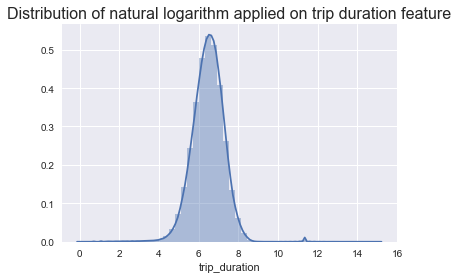

In [12]:
target = np.log(train_df['trip_duration'])
print("Skew is:", target.skew())
sns.distplot(target)
plt.title("Distribution of natural logarithm applied on trip duration feature", size=16)
plt.show()

For the sake of meaningful visualization, we store the result in another variable so that we will be able to make use of it during the processing part.

<u>Correlation with trip duration</u>

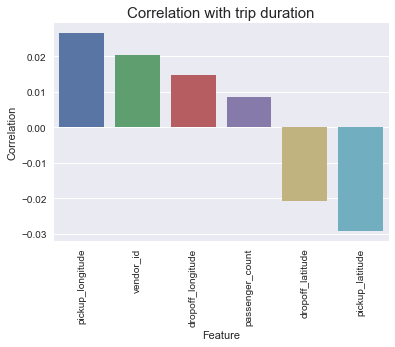

In [13]:
corr = train_df.drop(['id'], axis=1).corr()
corr_df = pd.DataFrame(corr['trip_duration'].sort_values(ascending=False))[1:]
corr_df.columns = ['Correlation']
corr_df.index.name = 'Feature'

ax = sns.barplot(x=corr_df.index, y='Correlation', data=corr_df)
ax.set(ylabel='Correlation')
plt.xticks(rotation=90)
plt.title('Correlation with trip duration', size=15)
plt.show()

We observe that there is not strong relation with the trip duration and the actual numerical features. <br>
We need to feature engineering the string features to establish a new correlation plot as we might infer something more interesting.

<h3 style="text-align:center">Data Cleaning</h3>

In [14]:
pd.DataFrame( {'passenger_count (train set)': train_df['passenger_count'].value_counts(),
              'passenger_count (test_set)' : test_df['passenger_count'].value_counts()} )

,passenger_count (test_set),passenger_count (train set)
0,23.0,60
1,443447.0,1033540
2,90027.0,210318
3,25686.0,59896
4,12017.0,28404
5,33411.0,78088
6,20521.0,48333
7,NaN,3
8,NaN,1
9,2.0,1


We will treat values with 0 passenger_count to 1. <br>

In [15]:
def clean_passenger_count(dataset):
    dataset.loc[ dataset['passenger_count'] == 0, 'passenger_count' ] = 1

clean_passenger_count(train_df)
clean_passenger_count(test_df)

In [16]:
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [17]:
# Pie chart with Bokeh
pie_chart = Donut(train_df['passenger_count'].value_counts())
show(pie_chart)

<u>Trip duration</u>

In [18]:
train_df.loc[ train_df['trip_duration'] > 80000, : ].shape

(1899, 11)

About 1900 trips accounted a trip duration of about 80000s, which is nearly 1 day! <br>

In [19]:
train_df.loc[ train_df['trip_duration'] > 70000, : ].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197


<h3 style="text-align:center">Feature Engineering</h3>

In [20]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [21]:
# convert feature to datetime
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], \
                    format="%Y-%m-%d %H:%M:%S") 

# Extract weekday number (from Monday=0 to Sunday=6)
train_df['DayOfWeekNum'] = train_df['pickup_datetime'].dt.dayofweek

# Extract Month 
train_df['Month'] = train_df['pickup_datetime'].dt.month

# Extract the Month's day from 0 to 31
train_df['DayOfMonth'] = train_df['pickup_datetime'].dt.day

# Extract the Hour of the day
train_df['HourOfDay'] = train_df['pickup_datetime'].dt.hour


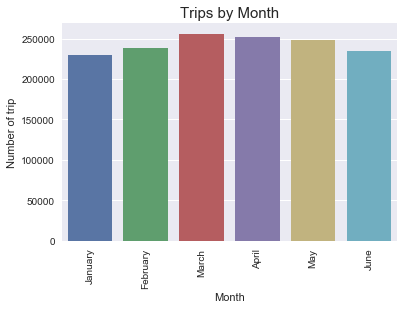

In [22]:
fig, ax = plt.subplots()

sns.countplot(x='Month', 
             data=train_df)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['January', 'February', 'March', 'April', 'May', 'June']

ax.set_xticklabels(labels)

plt.xticks(rotation=90)
plt.title('Trips by Month', size=15)
plt.ylabel('Number of trip')

plt.show()

Interestingly, the data provided only offers the trips of the first half of 2016. <br>
Furthermore, we observe that March was the most successful month in terms of number of trips. <br>
On the other hand January is not as successful, probably due to the fact that January is usually the coldest month of the year for New York.

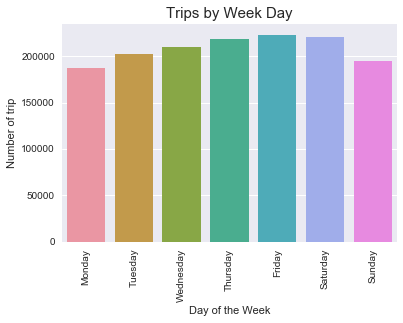

In [23]:
fig, ax = plt.subplots()

sns.countplot(x='DayOfWeekNum',
              data=train_df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
         'Friday', 'Saturday', 'Sunday']

ax.set_xticklabels(labels)

plt.xticks(rotation=90)
plt.title('Trips by Week Day', size=15)
plt.xlabel('Day of the Week')
plt.ylabel('Number of trip')


plt.show()

This previous plot display how the traffic of taxis is doing during the weeks. <br>
Friday seems to be the most profitable day with Saturday while Sunday and Monday are the less demanding of taxis.

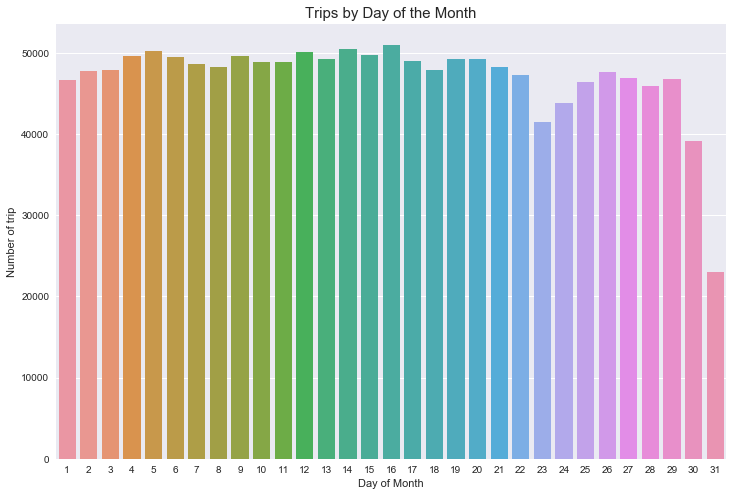

In [24]:
plt.figure(figsize=(12,8))

sns.countplot(x='DayOfMonth',
             data=train_df)

plt.title('Trips by Day of the Month', size=15)
plt.xlabel('Day of Month')
plt.ylabel('Number of trip')

plt.show()

The repartition is quite well distributed. <br>
One might notice that the 31st there is way less trips but that is due to the fact there is way less 31st number in the year. <br>
In 2016, only January, March and May had 31 days in the first half of the year. <br>
Days with 31 days also include day 30 so end of months are quite low regarding number of trips from taxis comparing to other days.

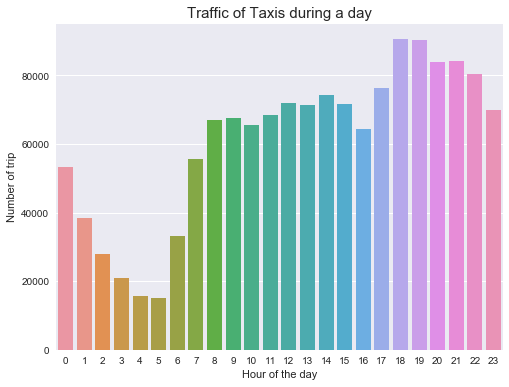

In [25]:
plt.figure(figsize=(8,6))

sns.countplot(x='HourOfDay',
           data=train_df)

plt.title('Traffic of Taxis during a day', size=15)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trip')

plt.show()

Clearly from this plot we can infer that peak times are [6pm : 7pm] and off-peak times are [4am : 5pm].
From 6am the trend is growing up to 7pm. And past this hour, the trend is going the other way.

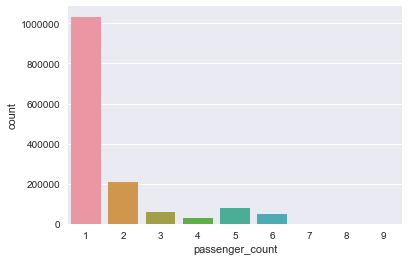

In [26]:
sns.countplot(train_df['passenger_count'])

<u>Passenger count</u>

In [27]:
train_df['passenger_count'].value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

We will group the number of passenger to be less sparse.

In [28]:
def transform_passenger_count(dataset):
    dataset.loc[ dataset['passenger_count'] >= 3, 'passenger_count' ] = 3
    
transform_passenger_count(train_df)
transform_passenger_count(test_df)

# train_df.loc[ train_df['passenger_count'] >= 3, 'passenger_count' ] = 3

In [29]:
# Pie chart with Bokeh
pie_chart = Donut(train_df['passenger_count'].value_counts())
show(pie_chart)

<u>Distance in miles</u>

In [30]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,DayOfWeekNum,Month,DayOfMonth,HourOfDay
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,26,13


In [41]:
from geopy.distance import great_circle

def distance_calc(row):
    pickup  = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    
    return great_circle(pickup, dropoff).km

def get_distance(dataset):
    dataset['distance'] = dataset.apply(lambda row: distance_calc(row), axis=1)
    dataset.drop(['pickup_latitude', 'pickup_longitude', \
                  'dropoff_latitude','dropoff_longitude'], 
                   axis=1,
                   inplace=True)
    
# train_df['distance'] = train_df.apply(lambda row: distance_calc(row), axis=1)


# Note : Quite long to compute 
get_distance(train_df)
get_distance(test_df)

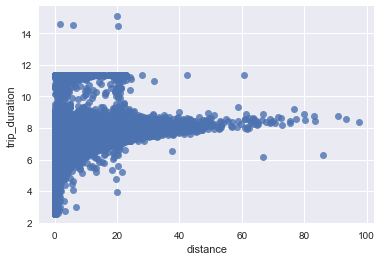

In [48]:
target = np.log(train_df['trip_duration'])
sns.regplot(x='distance', y=target, data=train_df,
           fit_reg=False)


The plot did not satisfy our expectation of a regression line due to the outliers.<br>
First we will need to remove them

In [109]:
train_df = train_df[ train_df['distance'] < 100 ]

# target and train_df should be same dimension so we should carefully delete the outlier in the y-axis
target = pd.DataFrame(target)
outliers = target[target['trip_duration'] > 12].index.tolist()
train_df.drop(outliers, inplace=True)
target.drop(outliers, inplace=True)

ValueError: labels [355003 680594 924150 978383] not contained in axis

In [91]:
sns.regplot(x='distance', y=target, data=train_df,
           fit_reg=False)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Let's look at what the regression line might look like (via fit_reg in seaborn)

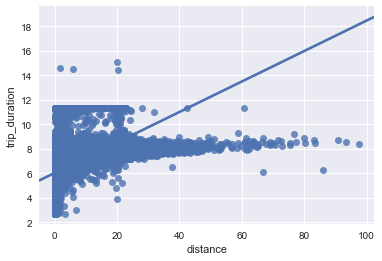

In [64]:
sns.regplot(x='distance', y=target, data=train_df,
           fit_reg=True)

The regression fail to predict a lot of values. <br>
We will look if applying a function to the distance will end up with a better regression line.

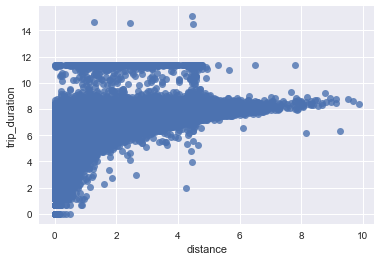

In [26]:
target = np.log(train_df['trip_duration'])
dist_log = np.sqrt(train_df['distance'])
sns.regplot(x=dist_log, y=target, data=train_df,
           fit_reg=False)

KeyboardInterrupt: 

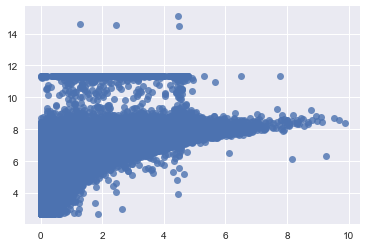

In [92]:
target = np.log(train_df['trip_duration'])
dist_log = np.sqrt(train_df['distance'])
sns.regplot(x=dist_log, y=target, data=train_df,
           fit_reg=True)

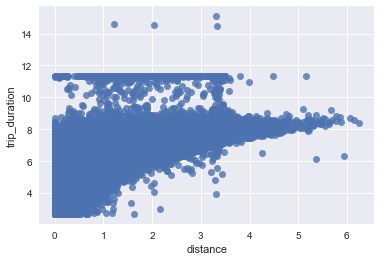

In [93]:
target = np.log(train_df['trip_duration'])
dist_log = np.power(train_df['distance'], 0.4)
sns.regplot(x=dist_log, y=target, data=train_df,
           fit_reg=False)

In [89]:
target[target['trip_duration'] < 12].shape

(1455801, 1)

<u>Datetime</u>

In the same way when we try to get information out off the pickup_datetime feature, we will extend this to the dropoff datetime and apply the same transformation to the test set.

In [32]:
train_df.drop(['dropoff_datetime','DayOfWeekNum', 'Month', 'DayOfMonth', 'HourOfDay'], axis=1, inplace=True)

In [33]:
def transform_datetime(dataset):
    # convert column to datetime type
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'], \
                    format="%Y-%m-%d %H:%M:%S")
    
    # Extract weekday number (from Monday=0 to Sunday=6)
    dataset['Pickup_NumDayWeek'] = dataset['pickup_datetime'].dt.dayofweek
    
    # Extract Month 
    dataset['Month'] = dataset['pickup_datetime'].dt.month
    
    # Extract the Month's pickup day from 0 to 31
    dataset['Pickup_Day'] = dataset['pickup_datetime'].dt.day
        
    # Extract the pickup Hour/Minute/Seconds
    dataset['Pickup_Hour'] = dataset['pickup_datetime'].dt.hour
    dataset['Pickup_Minute'] = dataset['pickup_datetime'].dt.minute
    dataset['Pickup_Second'] = dataset['pickup_datetime'].dt.second
        
    dataset = dataset.drop( ['pickup_datetime'], axis=1, inplace=True )
    
transform_datetime(train_df)
transform_datetime(test_df)

In [34]:
test_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'Pickup_NumDayWeek', 'Month', 'Pickup_Day',
       'Pickup_Hour', 'Pickup_Minute', 'Pickup_Second'],
      dtype='object')

In [35]:
train_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_NumDayWeek,Month,Pickup_Day,Pickup_Hour,Pickup_Minute,Pickup_Second
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,14,17,24,55
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,12,0,43,35
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,19,11,35,24
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2,4,6,19,32,31
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,5,3,26,13,30,55


<u>store_and_fwd_flag</u>

In [36]:
train_df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [37]:
test_df['store_and_fwd_flag'].value_counts()

N    621704
Y      3430
Name: store_and_fwd_flag, dtype: int64

In [38]:
def transform_store_and_fwd_flag(dataset):
    dataset['store_and_fwd_flag'] = dataset['store_and_fwd_flag'].map( {'Y': 1, 'N': 0} ).astype(int)

transform_store_and_fwd_flag(train_df)
transform_store_and_fwd_flag(test_df)

In [39]:
train_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_NumDayWeek,Month,Pickup_Day,Pickup_Hour,Pickup_Minute,Pickup_Second
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,3,14,17,24,55
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,12,0,43,35
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,19,11,35,24
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,4,6,19,32,31
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,3,26,13,30,55


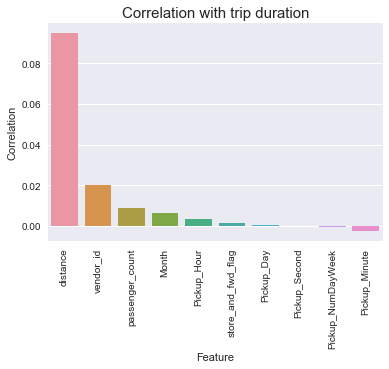

In [46]:
corr = train_df.drop(['id'], axis=1).corr()
corr_df = pd.DataFrame(corr['trip_duration'].sort_values(ascending=False))[1:]
corr_df.columns = ['Correlation']
corr_df.index.name = 'Feature'

ax = sns.barplot(x=corr_df.index, y='Correlation', data=corr_df)
ax.set(ylabel='Correlation')
plt.xticks(rotation=90)
plt.title('Correlation with trip duration', size=15)
plt.show()

<h3 style="text-align:center">Saving train and test set (checkpoint)</h3>

In [ ]:
# Saving into pickle file
train_df.to_pickle('train_df.p')
test_df.to_pickle('test_df.p')


In [3]:
# Loading the pickle file, analysis can start here and we don't have to process the previous code each time we come back
train_df = pd.read_pickle('train_df.p')
test_df = pd.read_pickle('test_df.p')

In [4]:
train_df.head()

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,Pickup_NumDayWeek,Month,Pickup_Day,Pickup_Hour,Pickup_Minute,Pickup_Second,distance
0,id2875421,2,1,0,455,0,3,14,17,24,55,1.498943
1,id2377394,1,1,0,663,6,6,12,0,43,35,1.806016
2,id3858529,2,1,0,2124,1,1,19,11,35,24,6.386897
3,id3504673,2,1,0,429,2,4,6,19,32,31,1.485917
4,id2181028,2,1,0,435,5,3,26,13,30,55,1.188923


In [6]:
test_df.shape

(625134, 11)

In [7]:
train_df.shape

(1458644, 12)

<h3 style="text-align:center">Split-out dataset</h3>

In [8]:
# Test options and evaluation metric
num_folds = 10 
seed = 46
test_size = 0.20
scoring = 'r2'